## **Importing Packages**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score,confusion_matrix,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

print("Import successfull")

Import successfull


## **Loading WeatherDataset & viewing dataset**

In [2]:
#Loading the data into df frame

df = pd.read_excel("weather_data.xlsx")
print("Data loaded successfully...")

Data loaded successfully...


In [3]:
df['Condition'].value_counts()

Condition
Partly Cloudy    877
Fair             744
Rain             711
Fog              667
Mostly Cloudy    306
Name: count, dtype: int64

In [4]:
#Displaying first few rows of data

df.head()

,Date,Time,Temperature F,Dew Point F,Humidity %,Wind,Wind Speed mph,Wind Gust mph,Pressure in,Precip.,Condition
0,2015-01-01,18:00:00,77,73,89,ESE,7,0,26.81,0.0 in,Partly Cloudy
1,NaT,18:30:00,77,73,89,SE,8,0,26.81,0.0 in,Partly Cloudy
2,NaT,19:00:00,75,73,94,ESE,5,0,26.81,0.0 in,Partly Cloudy
3,NaT,19:30:00,75,73,94,SE,6,0,26.78,0.0 in,Partly Cloudy
4,NaT,20:00:00,75,73,94,SSE,8,0,26.78,0.0 in,Partly Cloudy


In [5]:
#Displaying last few rows of data

df.tail()

,Date,Time,Temperature F,Dew Point F,Humidity %,Wind,Wind Speed mph,Wind Gust mph,Pressure in,Precip.,Condition
3300,NaT,01:09:00,61,61,100,E,3,0,26.99,0.0 in,Fog
3301,NaT,01:30:00,59,59,100,VAR,3,0,27.02,0.0 in,Fog
3302,NaT,02:00:00,61,61,100,VAR,2,0,27.02,0.0 in,Fog
3303,NaT,02:30:00,63,63,100,VAR,2,0,27.02,0.0 in,Fog
3304,NaT,03:00:00,66,66,100,E,5,0,27.02,0.0 in,Fog


In [6]:
#Providing concise report of data

df.info()

#df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305 entries, 0 to 3304
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            143 non-null    datetime64[ns]
 1   Time            3305 non-null   object        
 2   Temperature F   3305 non-null   int64         
 3   Dew Point F     3305 non-null   int64         
 4   Humidity %      3305 non-null   int64         
 5   Wind            3301 non-null   object        
 6   Wind Speed mph  3305 non-null   int64         
 7   Wind Gust mph   3305 non-null   int64         
 8   Pressure in     3305 non-null   float64       
 9   Precip.         3305 non-null   object        
 10  Condition       3305 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 284.2+ KB


In [7]:
#Checking column names before Data cleaning

df.columns

Index(['Date', 'Time', 'Temperature F', 'Dew Point F', 'Humidity %', 'Wind',
       'Wind Speed mph', 'Wind Gust mph', 'Pressure in', 'Precip.',
       'Condition'],
      dtype='object')

## **Cleaning and Preprocessing**

---------- Changing the unit from Fahrenheit to Celcius ------------

In [8]:
# 0°F − 32) × 5/9 = -17.78°C

df['Temperature F'] = df['Temperature F'].apply(lambda x:  (x-32)*5/9)
df['Dew Point F']   = df['Dew Point F'].apply(lambda x: (x-32)*5/9)


In [9]:
#Printing few data from the dataset to revalidate

df.head()

,Date,Time,Temperature F,Dew Point F,Humidity %,Wind,Wind Speed mph,Wind Gust mph,Pressure in,Precip.,Condition
0,2015-01-01,18:00:00,25.000000,22.777778,89,ESE,7,0,26.81,0.0 in,Partly Cloudy
1,NaT,18:30:00,25.000000,22.777778,89,SE,8,0,26.81,0.0 in,Partly Cloudy
2,NaT,19:00:00,23.888889,22.777778,94,ESE,5,0,26.81,0.0 in,Partly Cloudy
3,NaT,19:30:00,23.888889,22.777778,94,SE,6,0,26.78,0.0 in,Partly Cloudy
4,NaT,20:00:00,23.888889,22.777778,94,SSE,8,0,26.78,0.0 in,Partly Cloudy


## **Column Name changing**

In [10]:
df.rename(columns={'Temperature F': 'Temperature C'}, inplace=True)
df.rename(columns={'Dew Point F': 'Dew Point C'}, inplace=True)


In [11]:
df.head()

,Date,Time,Temperature C,Dew Point C,Humidity %,Wind,Wind Speed mph,Wind Gust mph,Pressure in,Precip.,Condition
0,2015-01-01,18:00:00,25.000000,22.777778,89,ESE,7,0,26.81,0.0 in,Partly Cloudy
1,NaT,18:30:00,25.000000,22.777778,89,SE,8,0,26.81,0.0 in,Partly Cloudy
2,NaT,19:00:00,23.888889,22.777778,94,ESE,5,0,26.81,0.0 in,Partly Cloudy
3,NaT,19:30:00,23.888889,22.777778,94,SE,6,0,26.78,0.0 in,Partly Cloudy
4,NaT,20:00:00,23.888889,22.777778,94,SSE,8,0,26.78,0.0 in,Partly Cloudy


In [12]:
df['Condition'].value_counts()

Condition
Partly Cloudy    877
Fair             744
Rain             711
Fog              667
Mostly Cloudy    306
Name: count, dtype: int64

## **Replacement of few Conditions to Certain accordingly**

In [14]:
# Replacing Light Rain,Light Drizzle,Rain,Drizzle, Drizzle,Rain Shower,Light Rain / Windy as Rain
lst1 = ["Light Rain","Light Drizzle","Drizzle","Rain","Rain Shower","Light Rain / Windy","Heavy Rain","Rain / Windy","Rain Shower / Windy","Showers in the Vicinity","Heavy T-Storm","Light Driz","Light Rain with Thunder"]
lst2 = ["T-Storm / Windy","Heavy T-Storm / Windy","Thunder / Windy","Mostly Cloudy / Windy"]
# Replacing function
df['Condition'] = df['Condition'].apply(lambda x: 'Rain' if x in lst1 else x )
df['Condition'] = df['Condition'].apply(lambda x: 'Windy' if x in lst2 else x )      
# df['Condition'] = df['Condition'].map({'Light Rain':'Rain','Light Drizzle':'Rain','Drizzle':'Rain','Rain Shower':'Rain','Light Rain / Windy':'Rain'})

In [15]:
df['Condition'].unique()

array(['Partly Cloudy', 'Rain', 'Fog', 'Mostly Cloudy', 'Fair'],
      dtype=object)

In [16]:
df['Condition'].value_counts()

Condition
Partly Cloudy    877
Fair             744
Rain             711
Fog              667
Mostly Cloudy    306
Name: count, dtype: int64

**Using Label Encoder to encode our Classes**

In [17]:
model = LabelEncoder()

df['Condition'] = model.fit_transform(df['Condition'])

In [18]:
df['Condition'].head()

0    3
1    3
2    3
3    3
4    3
Name: Condition, dtype: int32

## **Data Visualization**

In [19]:
df.columns

Index(['Date', 'Time', 'Temperature C', 'Dew Point C', 'Humidity %', 'Wind',
       'Wind Speed mph', 'Wind Gust mph', 'Pressure in', 'Precip.',
       'Condition'],
      dtype='object')

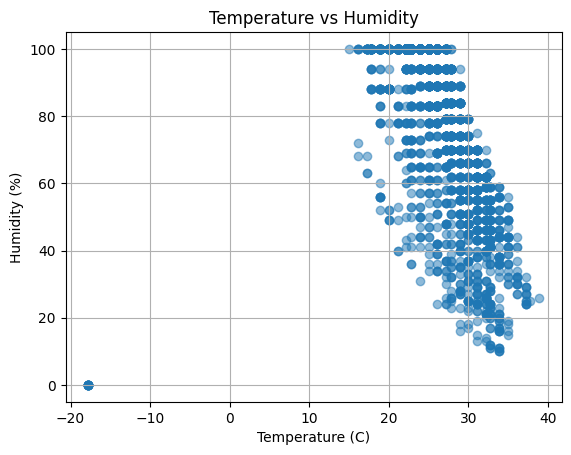

In [20]:
plt.scatter(df['Temperature C'], df['Humidity %'], alpha=0.5)
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity')
plt.grid(True)
plt.show()



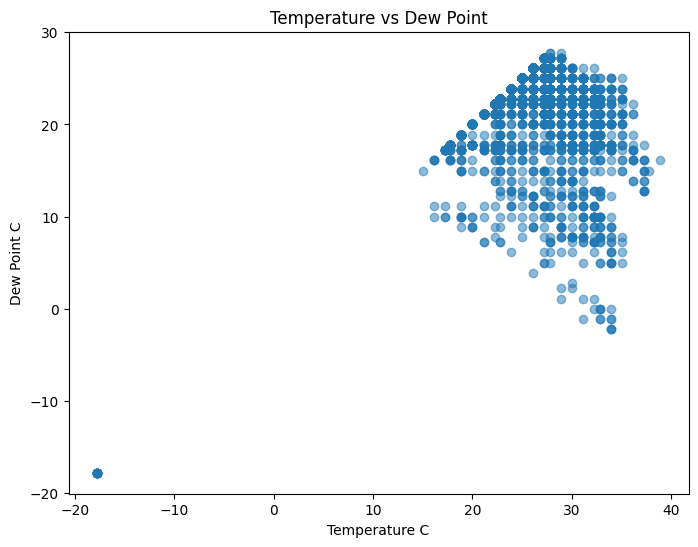

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature C'], df['Dew Point C'], alpha=0.5)
plt.xlabel('Temperature C')
plt.ylabel('Dew Point C')
plt.title('Temperature vs Dew Point')
plt.show()


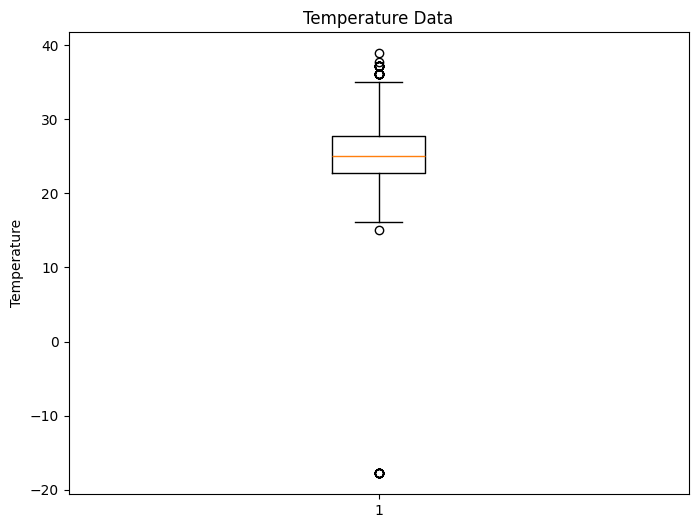

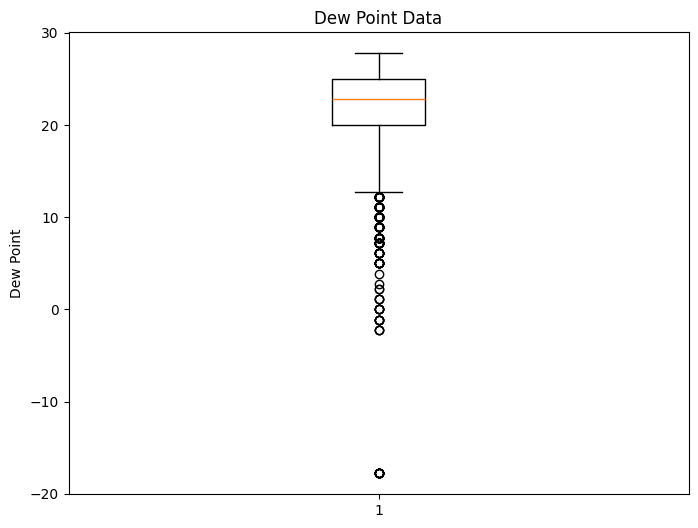

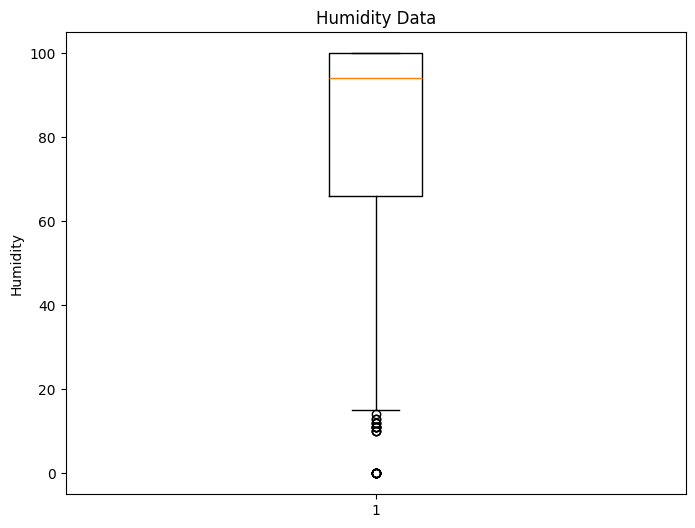

In [22]:
# Boxplot for Temperature
plt.figure(figsize=(8, 6))
plt.boxplot(df['Temperature C'])
plt.ylabel("Temperature")
plt.title("Temperature Data")
plt.show()

# Boxplot for Dew Point
plt.figure(figsize=(8, 6))
plt.boxplot(df['Dew Point C'])
plt.ylabel("Dew Point")
plt.title("Dew Point Data")
plt.show()

# Boxplot for Humidity
plt.figure(figsize=(8, 6))
plt.boxplot(df['Humidity %'])
plt.ylabel("Humidity")
plt.title("Humidity Data")
plt.show()


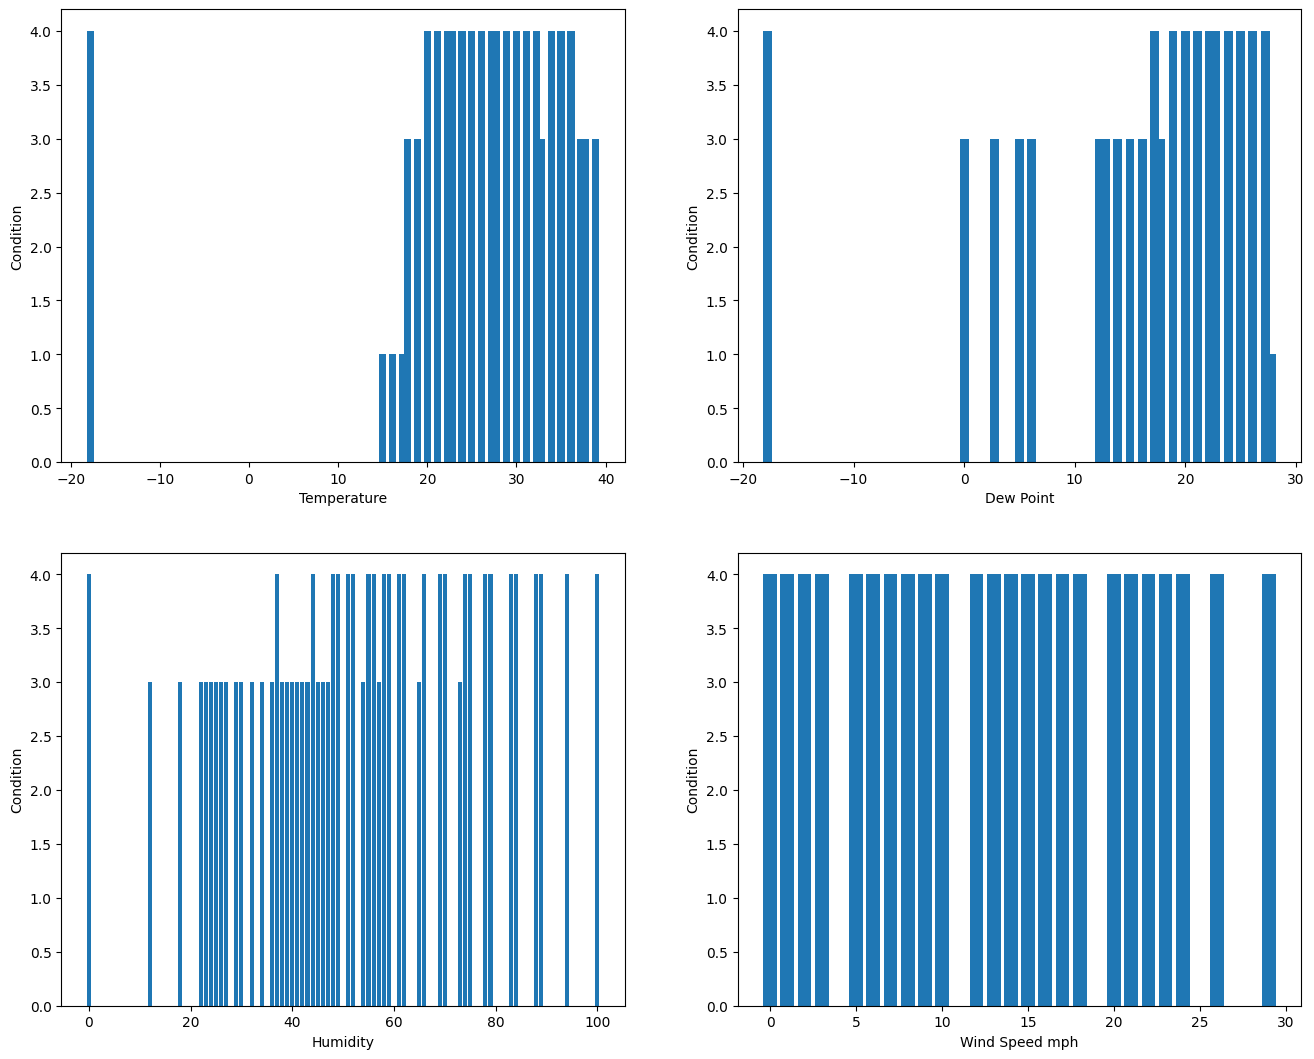

In [23]:
plt.figure(figsize=(16,20))
plt.subplot(3,2,1)
plt.bar(df['Temperature C'],df['Condition'])
plt.xlabel("Temperature")
plt.ylabel("Condition")

plt.subplot(3,2,2)
plt.bar(df['Dew Point C'],df['Condition'])
plt.xlabel("Dew Point")
plt.ylabel("Condition")

plt.subplot(3,2,3)
plt.bar(df['Humidity %'],df['Condition'])
plt.xlabel("Humidity")
plt.ylabel("Condition")

plt.subplot(3,2,4)
plt.bar(df['Wind Speed mph'],df['Condition'])
plt.xlabel("Wind Speed mph")
plt.ylabel("Condition")
plt.show()

In [24]:
print(df.columns)

Index(['Date', 'Time', 'Temperature C', 'Dew Point C', 'Humidity %', 'Wind',
       'Wind Speed mph', 'Wind Gust mph', 'Pressure in', 'Precip.',
       'Condition'],
      dtype='object')


## **Outliers Identification and Removals**

In [25]:
# Define columns where you want to remove outliers
columns_to_check = ['Temperature C', 'Dew Point C', 'Humidity %']  # Replace with your column names

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers and update the dataframe
data_no_outlier = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned data
print(data_no_outlier)

           Date      Time  Temperature C  Dew Point C  Humidity % Wind  \
0    2015-01-01  18:00:00      25.000000    22.777778          89  ESE   
1           NaT  18:30:00      25.000000    22.777778          89   SE   
2           NaT  19:00:00      23.888889    22.777778          94  ESE   
3           NaT  19:30:00      23.888889    22.777778          94   SE   
4           NaT  20:00:00      23.888889    22.777778          94  SSE   
...         ...       ...            ...          ...         ...  ...   
3299        NaT  01:00:00      16.111111    16.111111         100  VAR   
3300        NaT  01:09:00      16.111111    16.111111         100    E   
3302        NaT  02:00:00      16.111111    16.111111         100  VAR   
3303        NaT  02:30:00      17.222222    17.222222         100  VAR   
3304        NaT  03:00:00      18.888889    18.888889         100    E   

      Wind Speed mph  Wind Gust mph  Pressure in Precip.  Condition  
0                  7              0      

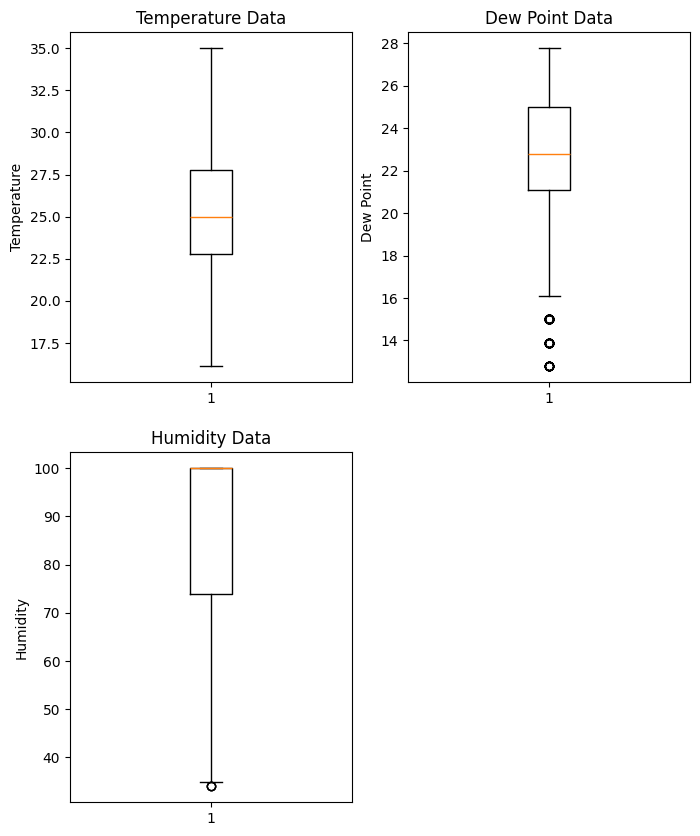

In [26]:
plt.figure(figsize=(8, 10))
plt.subplot(2,2,1)
plt.boxplot(data_no_outlier['Temperature C'])
plt.ylabel("Temperature")
plt.title("Temperature Data")

plt.subplot(2,2,2)
plt.boxplot(data_no_outlier['Dew Point C'])
plt.ylabel("Dew Point")
plt.title("Dew Point Data")

plt.subplot(2,2,3)
plt.boxplot(data_no_outlier['Humidity %'])
plt.ylabel("Humidity")
plt.title("Humidity Data")

plt.show()

## **Dataset splitting into Train and Test**

In [27]:
# Dividing the dataset into training and testing

scaler = StandardScaler()
X = df[['Temperature C','Dew Point C','Humidity %','Wind Speed mph','Wind Gust mph','Pressure in']]
y = df['Condition']
# X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [28]:
print(y_train)

3249    1
1024    3
1518    2
286     0
1714    2
       ..
157     1
402     0
2626    1
2811    4
2527    1
Name: Condition, Length: 2313, dtype: int32


## **K-NN Algorithm**

In [29]:
# 'haversine', 'l1', 'sokalsneath', 'euclidean', 'chebyshev', 'rogerstanimoto', 'cityblock', 'sqeuclidean', 'correlation', 'cosine', 'sokalmichener', 'pyfunc', 'manhattan',
#  'p', 'precomputed', 'yule', 'dice', 'infinity', 'nan_euclidean', 'russellrao', 'mahalanobis', 'seuclidean', 'canberra', 'jaccard', 'l2', 'minkowski', 'hamming', 'braycurtis'
knn = KNeighborsClassifier(n_neighbors=18, metric='cityblock')

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)


In [30]:

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
f1score = f1_score(y_test,y_pred, average='micro')
confusion = confusion_matrix(y_test,y_pred)

print("Accuracy of the model    : ",accuracy)
print("Precision of the model   : ",precision)
print("Recall score of the model: ",recall)
print("f1 score of the model    : ",f1score)
print("Confusion metric: \n",confusion)

Accuracy of the model    :  0.594758064516129
Precision of the model   :  0.594758064516129
Recall score of the model:  0.594758064516129
f1 score of the model    :  0.594758064516129
Confusion metric: 
 [[112  20   1  73   8]
 [  2 151   6   8  24]
 [  1  23  14  31  37]
 [ 18  22   6 199  20]
 [  4  35  23  40 114]]


## **Decision Tree Model**

In [31]:
# Using Decision Tree to train model
clf = DecisionTreeClassifier(max_depth=40, max_leaf_nodes=100, random_state=42)
clf.fit(X_train,y_train)

y_pred1 = clf.predict(X_test)


In [32]:
# Calculating the metric score
DT_accuracy = accuracy_score(y_test,y_pred1)
DT_precision = precision_score(y_test,y_pred1, average='micro')
DT_recall = recall_score(y_test,y_pred1, average='micro')
DT_f1score = f1_score(y_test,y_pred1, average='micro')
DT_confusion = confusion_matrix(y_test,y_pred1)

print("Accuracy score of Decision Tree model     : ",DT_accuracy)
print("Precision score of the Decision Tree model: ",DT_precision)
print("Recall score of the Decision Tree model   : ",DT_recall)
print("f1 score of the Decision Tree model       : ",DT_f1score)
print("Confusion matrix of Decision Tree model\n",DT_confusion)

Accuracy score of Decision Tree model     :  0.5917338709677419
Precision score of the Decision Tree model:  0.5917338709677419
Recall score of the Decision Tree model   :  0.5917338709677419
f1 score of the Decision Tree model       :  0.5917338709677419
Confusion matrix of Decision Tree model
 [[113  18   7  65  11]
 [  4 143   8   3  33]
 [  3  25  22  23  33]
 [ 16  28  15 188  18]
 [  1  39  24  31 121]]


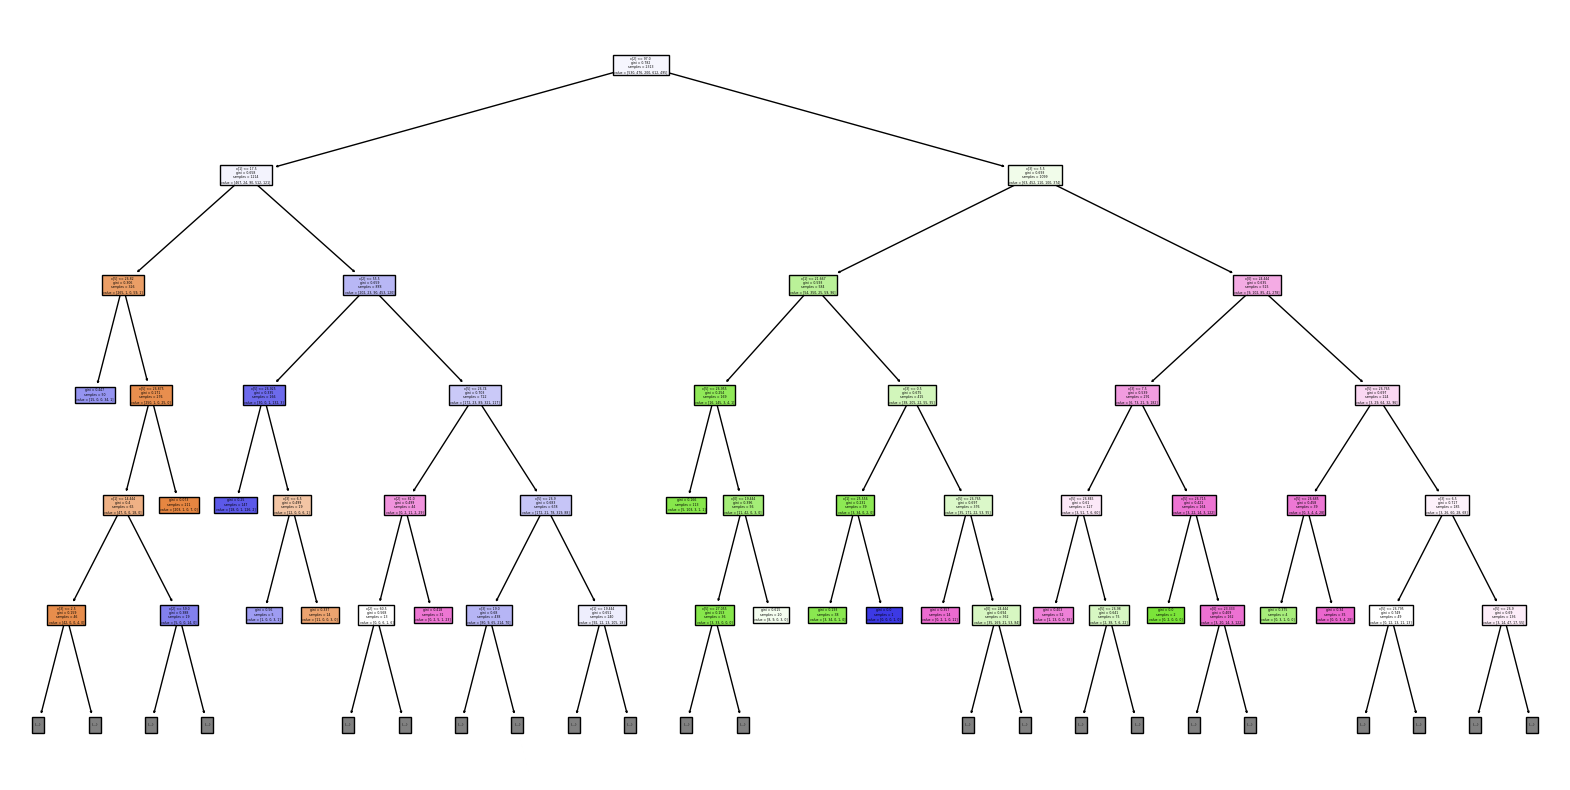

In [33]:
# Visualizing the decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(clf, filled=True, max_depth=5)  # Plotting the decision tree with max_depth=2
plt.show()

## **Random Forest Classificaion**

In [34]:
# Random Forest Classification

# import graphviz

# Creating an instance of Random forest classifier
rf = RandomForestClassifier()

# Fitting the data
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [35]:
# Calculating accuracy of the Random forest model
accuracy1 = accuracy_score(y_test,y_pred_rf)
precision1 = precision_score(y_test,y_pred1, average='micro')
recall1 = recall_score(y_test,y_pred1, average='micro')
f1score1 = f1_score(y_test,y_pred1, average='micro')
confusion1 = confusion_matrix(y_test,y_pred1)
print("Accuracy of Random Forest: ",accuracy1)
print("Precision of Random Forest: ",precision1)
print("Recall of Random Forest: ",recall1)
print("F1- Score of Random Forest: ",f1score1)

Accuracy of Random Forest:  0.6129032258064516
Precision of Random Forest:  0.5917338709677419
Recall of Random Forest:  0.5917338709677419
F1- Score of Random Forest:  0.5917338709677419


## **Naive Bayes Algorithm**

In [36]:
# Applying Naive Bayes Classification model

# Creating an instance of Gaussin model
GB = GaussianNB()
# Fitting the model with dataset
GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)
# Model evaluation
GB_accuracy = accuracy_score(y_test, y_pred_GB)
GB_precision = precision_score(y_test,y_pred1, average='micro')
GB_recall = recall_score(y_test,y_pred1, average='micro')
GB_f1score = f1_score(y_test,y_pred1, average='micro')
GB_confusion = confusion_matrix(y_test,y_pred1)


In [37]:

print("Accuracy score of Naive Bayes model     : ",GB_accuracy)
print("Precision score of the Naive Bayes model: ",GB_precision)
print("Recall score of the Naive Bayes model   : ",GB_recall)
print("f1 score of the Naive Bayes model       : ",GB_f1score)
print("Confusion matrix of Naive Bayes model\n",GB_confusion)

Accuracy score of Naive Bayes model     :  0.32056451612903225
Precision score of the Naive Bayes model:  0.5917338709677419
Recall score of the Naive Bayes model   :  0.5917338709677419
f1 score of the Naive Bayes model       :  0.5917338709677419
Confusion matrix of Naive Bayes model
 [[113  18   7  65  11]
 [  4 143   8   3  33]
 [  3  25  22  23  33]
 [ 16  28  15 188  18]
 [  1  39  24  31 121]]


## **Support Vector Machine**

In [38]:

#Create a svm Classifier
svm = svm.SVC(kernel='linear', C=2.0) # Linear Kernel

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = svm.predict(X_test)

accuracy_svm  = accuracy_score(y_test,y_pred_svm)
precision_svm = precision_score(y_test,y_pred_svm, average='micro')
recall_svm = recall_score(y_test,y_pred_svm, average='micro')
f1_score_svm = f1_score(y_test,y_pred_svm,average='micro')

print(f'accuracy of the model : {accuracy_svm}')
print(f'Precision of the model: {precision_svm}')
print(f'Recall of the model   : {recall_svm}')
print(f'f1 score of the model : {f1_score_svm}')

accuracy of the model : 0.5957661290322581
Precision of the model: 0.5957661290322581
Recall of the model   : 0.5957661290322581
f1 score of the model : 0.5957661290322581


## **SHAP**

Variable Importance plot- Globar Interpretation


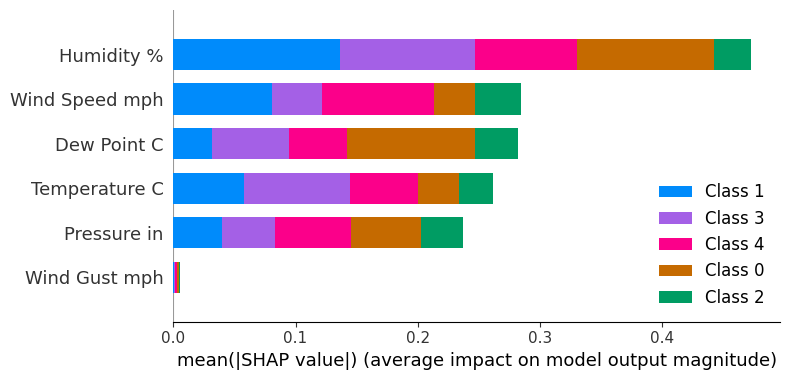

In [ ]:
# Applying shap to our model
import shap
import matplotlib.pyplot as plt
# load JS visualization code to notebook
shap.initjs()
# Create the explainer

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

print("Variable Importance plot- Globar Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

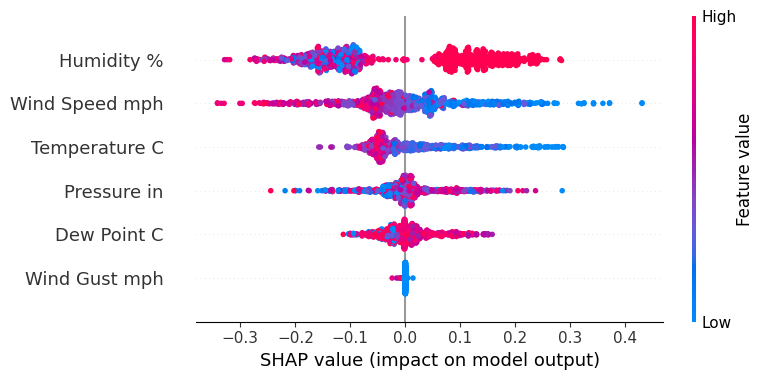

In [ ]:
shap.summary_plot(shap_values[1], X_test)

## **Loading Food Data**

In [39]:
food_data = pd.read_excel(r"final_food_data.xlsx")

In [40]:
food_data.shape

(190, 3)

In [41]:
food_data.sample(n=5)

,Food items,Weather,Khana
145,Pizzas,Fair,"Margherita Pizza, Pepperoni Pizza, Vegetarian ..."
59,Continental Indian,Partly Cloudy,"Butter Chicken, Rogan Josh, Chicken Tikka Masa..."
174,Sushi,Mostly Cloudy,"Nigiri, Sashimi, Maki Rolls, Tempura, Udon."
136,North Indian Sweets,Fair,"Gulab Jamun, Rasgulla, Jalebi, Barfi, Ladoo"
102,Italian Continental,Fair,"Spaghetti Carbonara, Margherita Pizza, Risotto..."


In [42]:
print(food_data['Weather'].value_counts())
print("----------------------------------------")
print(f'Shape of the dataset: {food_data.shape}')

Weather
Fair             91
Mostly Cloudy    44
Partly Cloudy    25
Sunny            17
Rainy             6
Foggy             5
Partly cloudy     1
Rain              1
Name: count, dtype: int64
----------------------------------------
Shape of the dataset: (190, 3)


In [43]:
food_data.isna().value_counts()
food_data.dropna()

,Food items,Weather,Khana
1,Afghani,Sunny,"Kabuli Pulao, Mantu, Ashak, Bolani, Chapli Keb..."
2,African,Mostly Cloudy,"Jollof Rice, Fufu, Piri Piri Chicken, Tagine, ..."
3,American,Fair,"Hamburger, Hotdog, Apple Pie, Clam Chowder, Bu..."
4,American Fast Food,Sunny,"Hamburger, Cheeseburger, French Fries, Hot Dog..."
5,American Snacks,Fair,"Popcorn, Pretzels, Potato Chips, French Fries,..."
...,...,...,...
185,Thalis,Partly Cloudy,"Rajasthani Thali, Gujarati Thali, South Indian..."
186,Tibetan,Mostly Cloudy,"Momos, Thukpa, Tingmo, Shapta, Phaksha Paa."
187,Turkish,Fair,"Doner, Adana, Shish, Baklava, Koftes, Pide, Me..."
188,Vietnamese,Partly Cloudy,"Pho, Banh Mi, Spring Rolls, Bun Cha, Banh Xeo."


In [44]:

food_data['Weather'] = food_data['Weather'].apply(lambda x: 'Rain' if x=='Rainy' else x)
food_data['Weather'] = food_data['Weather'].apply(lambda x: 'Partly Cloudy' if (x=='Partly cloudy' or x=='Sunny') else x)
food_data['Weather'] = food_data['Weather'].apply(lambda x: 'Fog' if x=='Foggy' else x)


## **Taking User's Input for weather prediciton**

In [45]:
user_input = []

# Take user input for each weather condition
temperature = float(input("Enter Temperature (in Celsius): "))
dew_point = float(input("Enter Dew Point (in Celsius): "))
humidity = float(input("Enter Humidity (%): "))
wind_speed = float(input("Enter Wind Speed (in mph): "))
wind_gust = float(input("Enter Wind Gust (in mph): "))
pressure = float(input("Enter Pressure (in): "))

# Append user input to the list
user_input.extend([temperature, dew_point, humidity, wind_speed, wind_gust, pressure])

#print(user_input)

data = {
    'Temperature C': [temperature],
    'Dew Point C': [dew_point],
    'Humidity %': [humidity],
    'Wind Speed mph': [wind_speed],
    'Wind Gust mph': [wind_gust],
    'Pressure in': [pressure]
}

# Convert the dictionary to a DataFrame
user_data = pd.DataFrame(data)

print(user_data)

   Temperature C  Dew Point C  Humidity %  Wind Speed mph  Wind Gust mph  \
0           45.0         30.0        88.0            15.0           12.0   

   Pressure in  
0         35.0  


------------- Considering all the models outputs -------------------

In [46]:
KNN_model_prediction = knn.predict(user_data)
Decision_tree_prediction = clf.predict(user_data)
Random_forest_Prediction = rf.predict(user_data)
Naive_Bayes_Prediction = GB.predict(user_data)
SVM_prediction = svm.predict(user_data)

## **Asking Restaurant the Need**

In [47]:
print("Naive Bayes Prediction", model.inverse_transform(Naive_Bayes_Prediction))
print("Random forest Prediction", model.inverse_transform(Random_forest_Prediction))
print("Decision Tree Prediction", model.inverse_transform(Decision_tree_prediction))
print("KNN model prediction", model.inverse_transform(KNN_model_prediction))
print("SVM Prediction", model.inverse_transform(SVM_prediction))

Naive Bayes Prediction ['Partly Cloudy']
Random forest Prediction ['Fair']
Decision Tree Prediction ['Rain']
KNN model prediction ['Rain']
SVM Prediction ['Fog']


**Taking Weather Input from user**

In [51]:

weather = input("Enter the Condition of Weather")
print(f'Entered Weather condition: {weather}')

Entered Weather condition: Rain


In [52]:

# Filter the DataFrame for the entered category in the 'Weather' column
filtered_data = food_data[food_data['Weather'] == weather]

# Extract the 'Food items' corresponding to the entered category and convert to a list
food_items_list = filtered_data['Food items'].tolist()

# Display the food items for the entered category
print(f"Food items for {weather}:")
for item in food_items_list:
    print(item)


Food items for Rain:
Assamese
Kerala
Indian  Snacks
Kerala
Malwani
North Eastern
Oriya


In [53]:
# Get the number of food items the user wants to check
num_food_items = int(input("Enter the number of food items: "))

for _ in range(num_food_items):
    # Get user input for the food item
    food_item = input("Enter the food item: ")

    # Filter the DataFrame for the entered food item in the 'Food items' column
    filtered_data = food_data[food_data['Food items'] == food_item]

    # Display the 'Khana' value for the entered food item
    if not filtered_data.empty:
        khana_value = filtered_data['Khana'].iloc[0]
        print({khana_value})
    else:
        print(f"No corresponding 'Khana' value found for '{food_item}'")


{'Appam with Stew, Puttu and Kadala Curry, Kerala Sadya, Avial, Idiyappam, Kerala Fish Curry, Thalassery Biriyani, Erachi Varutharacha Curry, Kerala Beef Fry, Kerala Prawn Curry'}
{' Malvani Fish Curry, Kombdi Vade, Sol Kadhi, Mori Masala, Malvani Mutton Sukka'}
